## Json
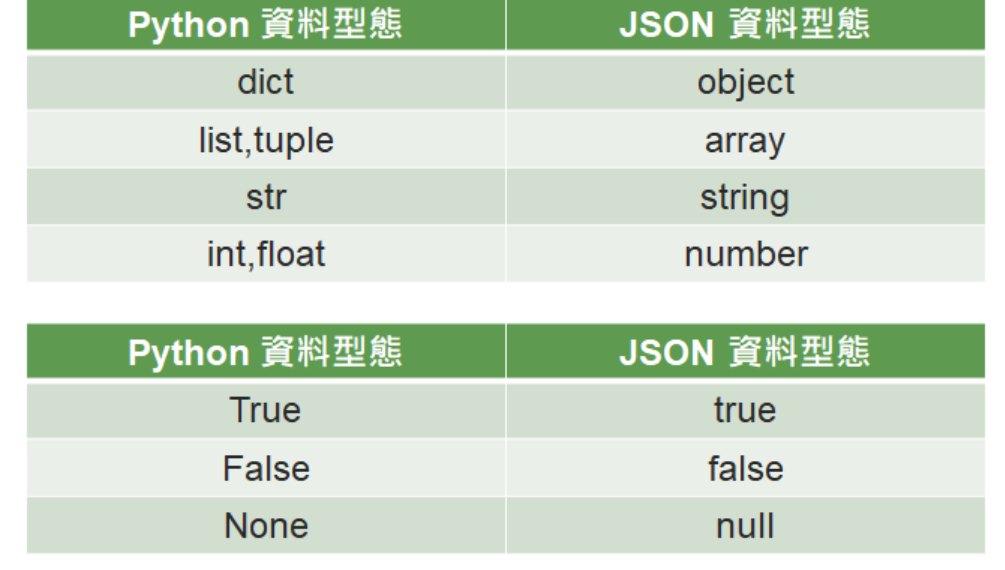
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [4]:
import json
json1 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsonStr = json.dumps(json1,ensure_ascii=False)#python to json str
print(jsonStr)

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}


In [5]:
import json
json2 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
with open('data0.json','w',encoding="utf-8") as outfile:
    json.dump(json2,outfile,ensure_ascii=False)

In [10]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
with open("data.json","w",encoding="utf-8") as outfile:
    # 加入indent 可增加閱讀性
    json.dump(data,outfile,ensure_ascii=False,indent=2)

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。


In [13]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))
print(json2["gjun"])

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>
100


In [15]:
import json
with open("data.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)  
    for k in  data:
        print(f"{k}-{data[k]}")

<class 'dict'>
people-[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [22]:
import os
class TestFile:
     def openFile(self,filePath):   
            self.handle = open(filePath,"w")
            self.handle.close()
            
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

Success


## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [23]:
import os
class TestFile:
     def openFile(self,filePath):               
            with  open(filePath,"w") as f:
                f.write("Hello!")
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

Success


## 壓縮與解壓縮 測試資料

In [42]:
import shutil
try:
  os.mkdir('test2')
  print('建立目錄')
except:
  print('建立目錄失敗')
with open('./test2/test2.txt', 'a') as file2:
  file2.write('Programming is Fun.')
  print('完成附加檔案')
with open('./test2/test3.txt', 'a') as file2:
  file2.write('Programiz for beginners')
  print('完成附加檔案')
print('查看目錄內容')
os.listdir('./test2')

建立目錄
完成附加檔案
完成附加檔案
查看目錄內容


['test2.txt', 'test3.txt']

## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。


In [49]:
import zipfile
def create_zip(path):
  zf = zipfile.ZipFile(f'{path}.zip', 'w', zipfile.ZIP_DEFLATED)
  for root, dirs, files in os.walk(path):
    for file_name in files:
      zf.write(os.path.join(root, file_name))
def ziplist(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  print(zf.namelist())
def extra_zip(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall()

try:
  print('壓縮資料')
  create_zip('test2')
except:
  print('壓縮失敗')

try:
  print('查看壓縮資料')
  ziplist('test2.zip')
except:
  print('查看壓縮資料失敗')

try:
  print('刪除目錄')
  shutil.rmtree("test2")
except:
  print('刪除目錄失敗')

try:
  print('解壓縮資料')
  extra_zip('test2.zip')
except:
  print('解壓縮失敗')





壓縮資料
查看壓縮資料
['test2/test2.txt', 'test2/test3.txt']
刪除目錄
解壓縮資料


## Numpy
+ 可做到的功能
  + 快速的多維陣列操作。
  + 可靠的科學功能函數庫。
  + 可協助繪圖工具進行繪圖。
+ NumPy 是幾乎每個科學 Python 應用程序或模組的核心，它提供了以向量化形式的快速 N-d 陣列類型可供操作。

In [53]:
import numpy as np
a = [1,2,3,5,7,9]
b = [3,5,3,6,7,9]
print(type(a))
np1 = np.array(a)
np2 = np.array(b)
print(type(np1))
print(type(np2))
print(np1 + np2)

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 4  7  6 11 14 18]


## 爬蟲

In [93]:
"""
需要安裝以下套件
!pip install beautifulsoup4
!pip install html5lib
!pip install requests
"""
import requests
from bs4 import BeautifulSoup


## BeautifulSoup Base
find() 只找第一個符合條件的

https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/#find-all

find_all() 找所有符合條件的

select_one() 只找一個符合條件的可直接使用css語法

select() 找所有符合條件的可使用css語法


In [94]:
html='''<a id='a1' class="c1">V1</a>
<a id='a2' class="c1">V2</a>
<a id='a3' class="c3">V3</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find(id="a1"))
print(soup.find_all(class_="c1"))

print(soup.select_one("#a1"))
print(soup.select(".c1"))

<a class="c1" id="a1">V1</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]
<a class="c1" id="a1">V1</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]


## 取得數值

get(屬性)

getText()

In [95]:
import requests
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1" href="https://google.com">Google</a>
<a id='a2' class="c1"  href="https://yahoo.com">Yahoo</a>
<a id='a3' class="c3" href="https://facebook.com">Facebook</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find(id="a1").getText())
print(soup.find(id="a1").get("href"))
tmpList = soup.find_all(class_ = "c1")
for tag in tmpList:
    print(tag.get("href"),tag.getText())

Google
https://google.com
https://google.com Google
https://yahoo.com Yahoo


# 使用html檔案練習

In [96]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
print("以下是列印一個h1元素: ")
objTag = objSoup.find('h1')
print(objTag.text)
print("以下是列印全部h1元素: ")
objTag = objSoup.find_all('h1')
for data in objTag:                       
    print(data.text)
objTag = objSoup.find_all('h2', limit=2)
print("以下是列印h2元素，只找兩個: ")
for data in objTag:                       
    print(data.text)

以下是列印一個h1元素: 
class與id練習測試h1標籤
以下是列印全部h1元素: 
class與id練習測試h1標籤
國家首都資料表
h1標籤測試1
h1標籤測試2
h1標籤測試3
h1標籤測試4
以下是列印h2元素，只找兩個: 
class與id練習測試h2標籤
程式語言清單


## 查詢 css中的class方法2，請留意查詢結果。 標籤為span且class為class1

In [97]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
objTag = objSoup.find_all('span',class_='class1')
for data in objTag:                       
    print(data)
    print(data.text)


<span class="class1">各種</span>
各種


## 查詢 css中的class方法3，請留意查詢結果。 是div標籤 類別為class1或class2

In [98]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
objTag = objSoup.find_all('div',{'class':{'class1','class2'}})
for data in objTag:                       
    print(data)
    print(data.text)

<div class="class1">故宮博物院</div>
故宮博物院
<div class="class2">日月潭</div>
日月潭
<div class="class2 class3">阿里山</div>
阿里山


## 標籤回傳內容

.string 會返回標籤最裡面的內容，如果標籤內還有其他子節點(若有子標籤，代表不是單純的字串)，而會輸出 None。

.strings 可以獲得多個內容，但需要加上迴圈進行資料查找處理。

.stripped_strings 可將輸出的字串中空白內容去除。 

repr(）方法可將物件或其他資料轉換為字串進行輸出!


In [109]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
print(objSoup.string)
print("-"*70)
# print(objSoup.strings)
# print("-"*70)
# for string in objSoup.strings:
#     print(string)
# print("-"*70)
# for string in objSoup.strings:
#     print(repr(string))
# for string in objSoup.stripped_strings:
#     print(repr(string))

None
----------------------------------------------------------------------


## 查找各種層級節點
### 子節點查找
標籤的 .content 屬性可以將標籤的子節點以 list 的方式輸出。

.children 返回的不是一個 list，不過我們可以透過這個屬性找到所有子節點。

.contents 和 .children 屬性僅包含標籤的直接子節點，.descendants 屬性可以對所有標籤的子孫節點進行尋找整理。

網頁語法的換行(不是換行的標籤)會造成空白的一個節點。

In [111]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
# for child in  objSoup.body.children:
#     print(child)
# print("-"*70)

## 兄弟節點查找

兄弟節點代表與選定的節點處在統一級的節點，如果不存在則傳回 None。

.next_sibling 屬性獲取了該節點的下一個兄弟節點。

.previous_sibling 屬性獲取了這個節點的上一個兄弟節點。

有些網頁的標籤的 .next_sibling 和 .previous_sibling 屬性也可能是空白，因為空白也可以被視作一個節點。

全部兄弟節點：

.next_siblings

.previous_siblings

In [117]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
print(objSoup.p)
print("-----------------------------0---")
print(objSoup.p.next_sibling)#因為有斷行所以是空白節點
print("-----------------------------1---")
print(objSoup.p.previous_sibling)#因為有斷行所以是空白節點
print("-----------------------------2---")
print(objSoup.p.next_sibling.next_sibling)
print("-----------------------------3---")
for sibling in objSoup.p.next_siblings:
    if sibling!='\n':
        print(repr(sibling))

<p>p標籤0</p>
-----------------------------0---


-----------------------------1---


-----------------------------2---
<p><b>粗體字 p1</b></p>
-----------------------------3---
<p><b>粗體字 p1</b></p>
<p>p標籤2</p>
<p>p標籤3</p>
<h1>h1標籤測試1</h1>
<h1>h1標籤測試2</h1>
<h1>h1標籤測試3</h1>
<h1>h1標籤測試4</h1>
<h2>h2標籤測試1</h2>
<h2>h2標籤測試2</h2>
<h2>h2標籤測試3</h2>
<h2>h2標籤測試4</h2>
<h3>h3標籤測試1</h3>
<h4>h4標籤測試1</h4>
'\n\n\n'


## 前後節點查找
.next_element 與 .previous_element 兩種屬性代表前後節點。

與 .next_sibling .previous_sibling 不同，它並不是針對於兄弟節點，而是在所有節點，不分層次。

.next_elements 與 .previous_elements 兩種屬性則是代表全部的前後節點。

In [129]:
import bs4
htmlFile = open('web1.html',encoding="utf8",errors='ignore')
objSoup = bs4.BeautifulSoup(htmlFile, 'html5lib')
print(objSoup.p)
print("-----------------------------0---")
print(objSoup.p.next_element)
print("----------------------------1----")
print(objSoup.p.previous_element)
print("----------------------------2----")
print(objSoup.p.next_element.next_element)
print("----------------------------3----")
print(objSoup.p.next_element.next_element.next_element)
print("----------------------------4----")
for element1 in objSoup.p.next_elements:
    if element1!='\n':
        print(repr(element1))

<p>p標籤0</p>
-----------------------------0---
p標籤0
----------------------------1----


----------------------------2----


----------------------------3----
<p><b>粗體字 p1</b></p>
----------------------------4----
'p標籤0'
<p><b>粗體字 p1</b></p>
<b>粗體字 p1</b>
'粗體字 p1'
<p>p標籤2</p>
'p標籤2'
<p>p標籤3</p>
'p標籤3'
<h1>h1標籤測試1</h1>
'h1標籤測試1'
<h1>h1標籤測試2</h1>
'h1標籤測試2'
<h1>h1標籤測試3</h1>
'h1標籤測試3'
<h1>h1標籤測試4</h1>
'h1標籤測試4'
<h2>h2標籤測試1</h2>
'h2標籤測試1'
<h2>h2標籤測試2</h2>
'h2標籤測試2'
<h2>h2標籤測試3</h2>
'h2標籤測試3'
<h2>h2標籤測試4</h2>
'h2標籤測試4'
<h3>h3標籤測試1</h3>
'h3標籤測試1'
<h4>h4標籤測試1</h4>
'h4標籤測試1'
'\n\n\n'


## 電影排行榜

In [140]:
import requests
from bs4 import BeautifulSoup
url = "https://zh.wikipedia.org/zh-tw/2023年电影"
resp = requests.get(url)
resp.encoding = "utf-8"
soup = BeautifulSoup(resp.text,"html5lib")
movieTable = soup.find("table",class_="wikitable sortable")
tbody =  movieTable.find("tbody")
trList = tbody.find_all("tr")
#print(trList)
for inx in range(1,len(trList)):
    print("排名:",trList[inx].find("th").text,end="")
    print("片名:",trList[inx].select_one("a").text)
    print("全球票房:",trList[inx].find_all("td")[2].text)

排名: 1
片名: 超級瑪利歐兄弟電影版
全球票房: $1,349,013,231

排名: 2
片名: 星際異攻隊3
全球票房: $844,797,833

排名: 3
片名: 玩命關頭X
全球票房: $704,709,660

排名: 4
片名: 蜘蛛人：穿越新宇宙
全球票房: $676,715,496

排名: 5
片名: 滿江紅
全球票房: $673,556,758

排名: 6
片名: 流浪地球2
全球票房: $604,456,556

排名: 7
片名: 小魚仙
全球票房: $560,848,888

排名: 8
片名: 消失的她
全球票房: $517,558,530

排名: 9
片名: 蟻人與黃蜂女：量子狂熱
全球票房: $476,071,180

排名: 10
片名: Barbie芭比
全球票房: $472,630,780



## Numpy簡介

In [142]:
import numpy as np
c1 = [1,3,5,7,9]
d1 = [3,5,6,7,9]
f1 = c1 + d1
print(f1)
c2 = np.array([1,3,5,7,9])
d2 = np.array([3,5,6,7,9])
f2 = c2 + d2
print(f2)

[1, 3, 5, 7, 9, 3, 5, 6, 7, 9]
[ 4  8 11 14 18]


+ ndarray.ndim
   + 維度的數量。
+ ndarray.shape
   + 顯示出陣列在每個維度上的整數值。
+ ndarray.size
   + 陣列內元素的總數。
+ ndarray.dtype
   + 用來描述陣列中元素類型的對象。

In [145]:
import numpy as np

i = [[1,2,3],
     [1,2,3]]
#軸
a = np.array(i,dtype = np.int8)
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)

2
(2, 3)
6
int8


In [154]:
import numpy as np
a = np.array([6,7,8,9])
b = np.arange(4)
print(a)
print(b)
c = a - b
print(c)
d = b**2
print(d)
f = np.array([5,-1,3,9,0])
print(f <= 3)
f[f <= 3] = 1
print(f)

[6 7 8 9]
[0 1 2 3]
[6 6 6 6]
[0 1 4 9]
[False  True  True False  True]
[5 1 1 9 1]


In [162]:
import numpy as np
x = np.empty((2,4))
print(x)
print("===============================")
x = np.zeros((2,4))
print(x)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [166]:
import numpy as np
x = np.ones((2,4))
print(x)
print("====================")
x = np.full((2,4),6)
print("====================")
print(x)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[6 6 6 6]
 [6 6 6 6]]


In [168]:
import numpy as np
x = np.eye(3)
print(x)
x = np.diag([1,2,3,4])
print(x)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
